<p>
  <b>AI Lab: Deep Learning for Computer Vision</b><br>
  <b><a href="https://www.wqu.edu/">WorldQuant University</a></b>
</p>

<div class="alert alert-success" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>
  <p>
    This file is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International</a>.
  </p>
  <p>
    You <b>can</b>:
    <ul>
      <li><span style="color: green">✓</span> Download this file</li>
      <li><span style="color: green">✓</span> Post this file in public repositories</li>
    </ul>
    You <b>must always</b>:
    <ul>
      <li><span style="color: green">✓</span> Give credit to <a href="https://www.wqu.edu/">WorldQuant University</a> for the creation of this file</li>
      <li><span style="color: green">✓</span> Provide a <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link to the license</a></li>
    </ul>
    You <b>cannot</b>:
    <ul>
      <li><span style="color: red">✗</span> Create derivatives or adaptations of this file</li>
      <li><span style="color: red">✗</span> Use this file for commercial purposes</li>
    </ul>
  </p>
  <p>
    Failure to follow these guidelines is a violation of your terms of service and could lead to your expulsion from WorldQuant University and the revocation your certificate.
  </p>
</div>

### Getting Ready

Before we can start this lesson there are two things we need to do. First, we need to import the libraries that we'll need to get our work done.

In [ ]:
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import torch
import torchvision
from PIL import Image
from torchvision import transforms

Second, it's a good idea to print out the version numbers for our libraries, including Python. That way, anyone who reviews our work we'll know exactly what software we used in case they want to reproduce it.

In [ ]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("PIL version:", PIL.__version__)
print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

In future lessons, we'll add a few more "getting ready" steps. For now, we're ready to start. 🏎️💨

### Working with Tensors in PyTorch

**Task 1.1.1:** Use the nested list `my_values` to create the tensor `my_tensor`.

In [17]:
my_values = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
my_tensor = torch.tensor(my_values)

print("my_tensor class:", type(my_tensor))
print(my_tensor)

my_tensor class: <class 'torch.Tensor'>
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])


### Tensor Attributes

**Task 1.1.2:** Print the dimensions and data type of `my_tensor`.

In [12]:
print("my_tensor shape:",my_tensor.shape) 

print("my_tensor dtype:", my_tensor.dtype)  

my_tensor shape: torch.Size([4, 3])
my_tensor dtype: torch.int64


Tensors also have a `.device` attribute, which specifies the hardware on which it's stored. By default, tensors are created on the computer's CPU. Let's check if that's the case for  `my_tensor`.



**Task 1.1.3:** Print the device of `my_tensor`.

In [14]:
print("my_tensor device:", my_tensor.device)

my_tensor device: cpu


Some computers come with GPUs, which allow for bigger and faster model building. In PyTorch, the `cuda` package is used to access GPUs on Linux and Windows machines; `mps` is used on Macs. Let's check what's available on the WQU virtual machines. 

In [15]:
# Check if GPUs available via `cuda`
cuda_gpus_available = torch.cuda.is_available()

# Check if GPUs available via `mps`
mps_gpus_available = torch.backends.mps.is_available()

print("cuda GPUs available:", cuda_gpus_available)
print("mps GPUs available:", mps_gpus_available)

cuda GPUs available: True
mps GPUs available: False


Looks like we have access to GPUs! To take advantage of this, we can change the tensor's device by using the `.to()` method. But note that if you are pushing tensors to a device, you have to reassign them.

**Task 1.1.4:** Change the device of `my_tensor` to `"cuda"`.

In [16]:
my_tensor = my_tensor.to("cuda")

print("my_tensor device:", my_tensor.device)

my_tensor device: cuda:0


We won't be able to see a performance boost with this tensor because it's already very small. However, switching devices will definitely speed up data preprocessing and models in later lessons.

### Tensor Slicing

**Task 1.1.5:** Slice `my_tensor`, assigning its top two rows to `left_tensor` and its bottom two rows to `right_tensor`.

In [19]:
left_tensor = my_tensor[:2, :]
right_tensor = my_tensor[2:, :]

print("left_tensor class:", type(left_tensor))
print("left_tensor shape:", left_tensor.shape)
print("left_tensor data type:", left_tensor.dtype)
print("left_tensor device:", left_tensor.device)
print(left_tensor)
print()
print("right_tensor class:", type(right_tensor))
print("right_tensor shape:", right_tensor.shape)
print("right_tensor data type:", right_tensor.dtype)
print("right_tensor device:", right_tensor.device)
print(right_tensor)

left_tensor class: <class 'torch.Tensor'>
left_tensor shape: torch.Size([2, 3])
left_tensor data type: torch.int64
left_tensor device: cpu
tensor([[1, 2, 3],
        [4, 5, 6]])

right_tensor class: <class 'torch.Tensor'>
right_tensor shape: torch.Size([2, 3])
right_tensor data type: torch.int64
right_tensor device: cpu
tensor([[ 7,  8,  9],
        [10, 11, 12]])


### Tensor Math

**Task 1.1.6:** Use both the mathematical operator and the class method to add `left_tensor` to `right_tensor`. Assign the results to `summed_tensor_operator` and `summed_tensor_method`, respectively.

In [20]:
summed_tensor_operator = left_tensor + right_tensor
summed_tensor_method = left_tensor.add(right_tensor)

print("summed_tensor_operator class:", type(summed_tensor_operator))
print("summed_tensor_operator shape:", summed_tensor_operator.shape)
print("summed_tensor_operator data type:", summed_tensor_operator.dtype)
print("summed_tensor_operator device:", summed_tensor_operator.device)
print(summed_tensor_operator)
print()
print("summed_tensor_method class:", type(summed_tensor_method))
print("summed_tensor_method shape:", summed_tensor_method.shape)
print("summed_tensor_method data type:", summed_tensor_method.dtype)
print("summed_tensor_method device:", summed_tensor_method.device)
print(summed_tensor_method)

summed_tensor_operator class: <class 'torch.Tensor'>
summed_tensor_operator shape: torch.Size([2, 3])
summed_tensor_operator data type: torch.int64
summed_tensor_operator device: cpu
tensor([[ 8, 10, 12],
        [14, 16, 18]])

summed_tensor_method class: <class 'torch.Tensor'>
summed_tensor_method shape: torch.Size([2, 3])
summed_tensor_method data type: torch.int64
summed_tensor_method device: cpu
tensor([[ 8, 10, 12],
        [14, 16, 18]])


One of the most important mathematical operations in deep learning is multiplication, so let's spend some time on it here.

Keep in mind that, when it comes to tensors, there's more than one type of multiplication. For starters, there's **element-wise multiplication**, where the corresponding values of two tensors are multiplied together. In PyTorch, we can do this using the `*` operator or the `.mul()` method.

**Task 1.1.7:** Use both the mathematical operator and the class method to multiply `left_tensor` to `right_tensor`. Assign the results to `ew_tensor_operator` and `ew_tensor_method`, respectively.

In [21]:
ew_tensor_operator = left_tensor * right_tensor
ew_tensor_method = left_tensor.mul(right_tensor)

print("ew_tensor_operator class:", type(ew_tensor_operator))
print("ew_tensor_operator shape:", ew_tensor_operator.shape)
print("ew_tensor_operator data type:", ew_tensor_operator.dtype)
print("ew_tensor_operator device:", ew_tensor_operator.device)
print(ew_tensor_operator)
print()
print("ew_tensor_method class:", type(ew_tensor_method))
print("ew_tensor_method shape:", ew_tensor_method.shape)
print("ew_tensor_method data type:", ew_tensor_method.dtype)
print("ew_tensor_method device:", ew_tensor_method.device)
print(ew_tensor_method)

ew_tensor_operator class: <class 'torch.Tensor'>
ew_tensor_operator shape: torch.Size([2, 3])
ew_tensor_operator data type: torch.int64
ew_tensor_operator device: cpu
tensor([[ 7, 16, 27],
        [40, 55, 72]])

ew_tensor_method class: <class 'torch.Tensor'>
ew_tensor_method shape: torch.Size([2, 3])
ew_tensor_method data type: torch.int64
ew_tensor_method device: cpu
tensor([[ 7, 16, 27],
        [40, 55, 72]])


Note that element-wise multiplication is **commutative**. It doesn't matter in what order we multiply the two tensors. The product of `left_tensor * right_tensor` is the same as the product of `right_tensor * left_tensor`.



In [ ]:
left_tensor * right_tensor == right_tensor * left_tensor

Next, there's **matrix multiplication**, which combines the rows and columns of two tensors to generate a new one. We can use the `@` operator or the `.matmul()` method.

To see how this works, let's create two new tensors with different shapes.

In [23]:
new_left_tensor = torch.Tensor([[2, 5], [7, 3]])
new_right_tensor = torch.Tensor([[8], [9]])

print("new_left_tensor class:", type(new_left_tensor))
print("new_left_tensor shape:", new_left_tensor.shape)
print("new_left_tensor data type:", new_left_tensor.dtype)
print("new_left_tensor device:", new_left_tensor.device)
print(new_left_tensor)
print()
print("new_right_tensor class:", type(new_right_tensor))
print("new_right_tensor shape:", new_right_tensor.shape)
print("new_right_tensor data type:", new_right_tensor.dtype)
print("new_right_tensor device:", new_right_tensor.device)
print(new_right_tensor)

new_left_tensor class: <class 'torch.Tensor'>
new_left_tensor shape: torch.Size([2, 2])
new_left_tensor data type: torch.float32
new_left_tensor device: cpu
tensor([[2., 5.],
        [7., 3.]])

new_right_tensor class: <class 'torch.Tensor'>
new_right_tensor shape: torch.Size([2, 1])
new_right_tensor data type: torch.float32
new_right_tensor device: cpu
tensor([[8.],
        [9.]])


Now let's multiply them!


**Task 1.1.8:** Use both the mathematical operator and the class method to perform matrix multiplication on `new_left_tensor` and `new_right_tensor`. Assign the results to `mm_tensor_operator` and `mm_tensor_method`, respectively.

In [24]:
mm_tensor_operator = new_left_tensor @ new_right_tensor
mm_tensor_method = new_left_tensor.matmul(new_right_tensor)

print("mm_tensor_operator class:", type(mm_tensor_operator))
print("mm_tensor_operator shape:", mm_tensor_operator.shape)
print("mm_tensor_operator data type:", mm_tensor_operator.dtype)
print("mm_tensor_operator device:", mm_tensor_operator.device)
print(mm_tensor_operator)
print()
print("mm_tensor_method class:", type(mm_tensor_method))
print("mm_tensor_method shape:", mm_tensor_method.shape)
print("mm_tensor_method data type:", mm_tensor_method.dtype)
print("mm_tensor_method device:", mm_tensor_method.device)
print(mm_tensor_method)

mm_tensor_operator class: <class 'torch.Tensor'>
mm_tensor_operator shape: torch.Size([2, 1])
mm_tensor_operator data type: torch.float32
mm_tensor_operator device: cpu
tensor([[61.],
        [83.]])

mm_tensor_method class: <class 'torch.Tensor'>
mm_tensor_method shape: torch.Size([2, 1])
mm_tensor_method data type: torch.float32
mm_tensor_method device: cpu
tensor([[61.],
        [83.]])


One very important thing to remember: matrix multiplication is **not commutative**. The number of columns in the tensor on the left must equal the number of rows in the tensor on the right. If these two dimensions don't match, your code will throw a `RunTimeError`.

In [28]:
mm_tensor_operator = new_left_tensor @ new_right_tensor

<div class="alert alert-info" role="alert">
Matrix multiplication is the way your models will train and make predictions, and dimension mismatches will be a common source of bugs when you start building models. For that reason, it's always important to check the shape of your tensors. 🤓
</div>

Lastly, tensors come with methods for aggregation calculations. For instance, if we wanted to know the mean of all the elements in `my_tensor`, we'd use the `.mean()` method

**Task 1.1.9:** Calculate the mean for all values in `my_tensor`.

In [30]:
my_tensor_mean = my_tensor.mean(dtype=torch.float32)

print("my_tensor_mean class:", type(my_tensor_mean))
print("my_tensor_mean shape:", my_tensor_mean.shape)
print("my_tensor_mean data type:", my_tensor_mean.dtype)
print("my_tensor_mean device:", my_tensor_mean.device)
print("my_tensor mean:", my_tensor_mean)

my_tensor_mean class: <class 'torch.Tensor'>
my_tensor_mean shape: torch.Size([])
my_tensor_mean data type: torch.float32
my_tensor_mean device: cpu
my_tensor mean: tensor(6.5000)


Using `.mean()` by itself is helpful if we want to aggregate all the elements in a tensor, but more often we want to aggregate along one of the tensor's axes. 

For example, what's the mean of each column in `my_tensor`? Remember that the dimensions of this tensor: `[4, 3]`. The first number in this list refers to the 4 rows, and the second to 3 columns. If we want the mean of each column, we need to reduce across the rows or first dimension. To do this, we use the `dim=` argument. And since Python uses 0-based indexing, we specify the first dimension with a `0`. 

**Task 1.1.10:** Calculate the mean for each column in `my_tensor`.

In [32]:
my_tensor_column_means = my_tensor.mean(dtype=torch.float32, dim=[0])

print("my_tensor_column_means class:", type(my_tensor_column_means))
print("my_tensor_column_means shape:", my_tensor_column_means.shape)
print("my_tensor_column_means data type:", my_tensor_column_means.dtype)
print("my_tensor_column_means device:", my_tensor_column_means.device)
print("my_tensor column means:", my_tensor_column_means)

my_tensor_column_means class: <class 'torch.Tensor'>
my_tensor_column_means shape: torch.Size([3])
my_tensor_column_means data type: torch.float32
my_tensor_column_means device: cpu
my_tensor column means: tensor([5.5000, 6.5000, 7.5000])


We now have some helpful tools for working with PyTorch tensors. We can check a tensor's shape, data type and device. We can manipulate a tensor by slicing it. We can perform mathematical operations on tensors, including matrix multiplication and aggregation calculations. 

Up next, let's apply our new skills by exploring the dataset for this project.

### Explore Files

**Task 1.1.11:** Following the pattern of `data_dir`, assign the path to the multi-class training data to `train_dir`.

In [33]:
data_dir = os.path.join("data_p1", "data_multiclass")
train_dir = os.path.join(data_dir, "train")

print("data_dir class:", type(data_dir))
print("Data directory:", data_dir)
print()
print("train_dir class:", type(train_dir))
print("Training data directory:", train_dir)

data_dir class: <class 'str'>
Data directory: data_p1/data_multiclass

train_dir class: <class 'str'>
Training data directory: data_p1/data_multiclass/train


Next, we'll list the contents of our training directory.

**Task 1.1.12:** Create a list of the contents of `train_dir`, and assign the result to `class_directories`.

In [34]:
class_directories = os.listdir(train_dir)

print("class_directories type:", type(class_directories))
print("class_directories length:", len(class_directories))
print(class_directories)

class_directories type: <class 'list'>
class_directories length: 8
['hog', 'blank', 'monkey_prosimian', 'antelope_duiker', 'leopard', 'civet_genet', 'bird', 'rodent']


It looks like our training directory contains 8 subdirectories. Judging by their names, each contains the images for one of the classes in our dataset.

Now that we know how our data is organized, let's check the distribution of our classes. In order to do this we'll need to count the number of files in each subdirectory. We'll store our results in a [pandas](https://pandas.pydata.org/pandas-docs/version/2.2/index.html) `Series()` for easy data visualization.

**Task 1.1.13:** Complete the `for` loop so that `class_distributions_dict` contains the name of each subdirectory as its keys and the number of files in each subdirectory as its values.

In [38]:
class_distributions_dict = {}

for subdirectory in class_directories:
   dir = os.path.join(train_dir, subdirectory)
   files = os.listdir(dir)
   num_files = len(files)
   class_distributions_dict[subdirectory] = num_files

class_distributions = pd.Series(class_distributions_dict)

print("class_distributions type:", type(class_distributions))
print("class_distributions shape:", class_distributions.shape)
print(class_distributions)

class_distributions type: <class 'pandas.core.series.Series'>
class_distributions shape: (8,)
hog                  978
blank               2213
monkey_prosimian    2492
antelope_duiker     2474
leopard             2254
civet_genet         2423
bird                1641
rodent              2013
dtype: int64


Let's make a bar chart from `class_distributions`.

**Task 1.1.14:** Create a bar chart from `class_distributions`.

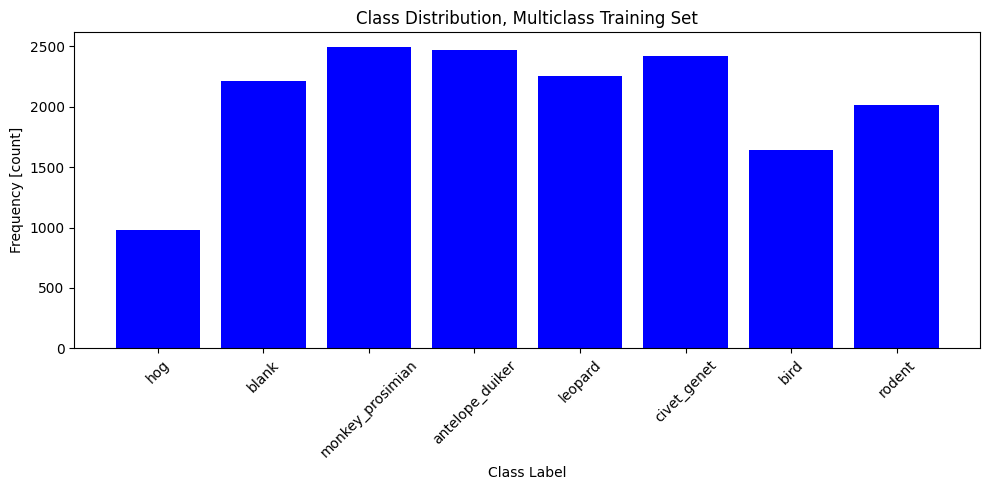

In [40]:
# Create a bar plot of class distributions
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
ax.bar(class_distributions.index, class_distributions.values, color=["blue"])  # Write your code here
ax.set_xlabel("Class Label")
ax.set_ylabel("Frequency [count]")
ax.set_title("Class Distribution, Multiclass Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Load Images

In [42]:
# Define path for hog image
hog_image_path = os.path.join(train_dir, "hog", "ZJ000072.jpg")

# Define path for antelope image
antelope_image_path = os.path.join(train_dir, "antelope_duiker", "ZJ002533.jpg")

print("hog_image_path type:", type(hog_image_path))
print(hog_image_path)
print()
print("antelope_image_path type:", type(antelope_image_path))
print(antelope_image_path)

hog_image_path type: <class 'str'>
data_p1/data_multiclass/train/hog/ZJ000072.jpg

antelope_image_path type: <class 'str'>
data_p1/data_multiclass/train/antelope_duiker/ZJ002533.jpg


To load these images, we'll use the [Pillow](https://pillow.readthedocs.io/en/stable/index.html) library (aka PIL), which comes with lots of tools for image processing. We'll start with the hog.

hog_image_pil type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


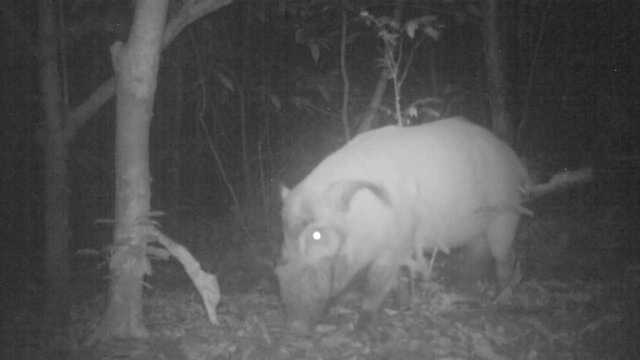

In [43]:
hog_image_pil = Image.open(hog_image_path)

print("hog_image_pil type:", type(hog_image_pil))
hog_image_pil

Next up, the antelope.

**Task 1.1.15:** Use PIL to open `antelope_image_path`.

antelope_image_pil type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


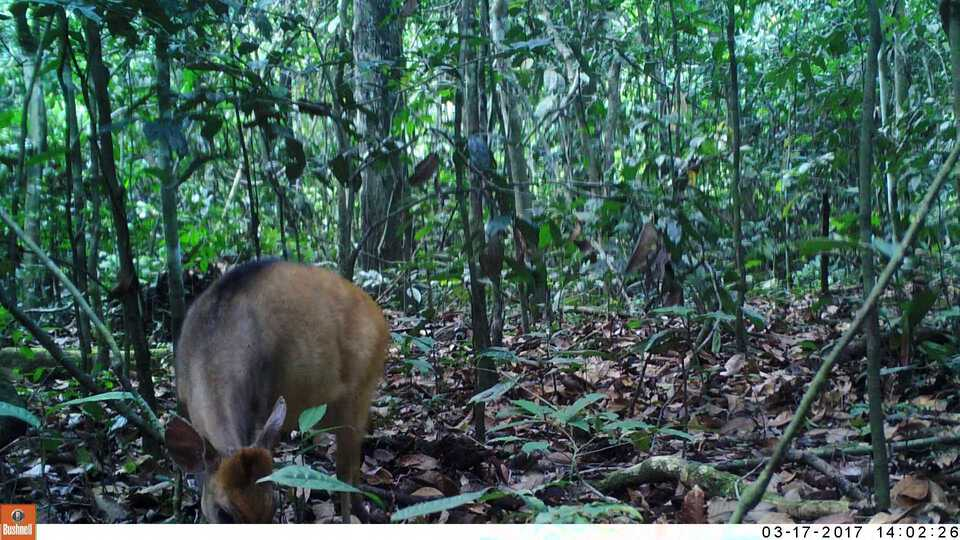

In [44]:
antelope_image_pil = Image.open(antelope_image_path)

print("antelope_image_pil type:", type(antelope_image_pil))
antelope_image_pil

Do you see any differences in the way these images look? Let's keep using PIL to explore further, looking at their `.size` and `.mode` attributes. Again, we'll start with the hog and then do the antelope.

In [45]:
# Get image size
hog_image_pil_size = hog_image_pil.size

# Get image mode
hog_image_pil_mode = hog_image_pil.mode

# Print results
print("hog_image_pil_size class:", type(hog_image_pil_size))
print("hog_image_pil_size length:", len(hog_image_pil_size))
print("Hog image size:", hog_image_pil_size)
print()
print("hog_image_pil_mode class:", type(hog_image_pil_mode))
print("Hog image mode:", hog_image_pil_mode)

hog_image_pil_size class: <class 'tuple'>
hog_image_pil_size length: 2
Hog image size: (640, 360)

hog_image_pil_mode class: <class 'str'>
Hog image mode: L


**Task 1.1.16:** Get the `.size` and `.mode` attributes from `antelope_image_pil` and assign the results to `antelope_image_pil_size` and `antelope_image_pil_mode`, respectively.

In [46]:
# Get image size
antelope_image_pil_size = antelope_image_pil.size

# Get image mode
antelope_image_pil_mode = antelope_image_pil.mode

# Get image mode
print("antelope_image_pil_size class:", type(antelope_image_pil_size))
print("antelope_image_pil_size length:", len(antelope_image_pil_size))
print("Antelope image size:", antelope_image_pil_size)
print()
print("antelope_image_pil_mode class:", type(antelope_image_pil_mode))
print("Antelope image mode:", antelope_image_pil_mode)

antelope_image_pil_size class: <class 'tuple'>
antelope_image_pil_size length: 2
Antelope image size: (960, 540)

antelope_image_pil_mode class: <class 'str'>
Antelope image mode: RGB


Looking at these attributes, we can confirm that there are two differences between our images.

- **Mode:** The hog image is in grayscale (`mode="L"`), while the antelope image is in color mode (`mode="RGB"`).
- **Size:** The hog images is smaller than the antelope image.

These differences are important because all the images in our dataset must have the same size and mode before we can use them to train a model.

### Load Tensors

In [47]:
hog_tensor = transforms.ToTensor()(hog_image_pil)

print("hog_tensor type:", type(hog_tensor))
print("hog_tensor shape:", hog_tensor.shape)
print("hog_tensor dtype:", hog_tensor.dtype)
print("hog_tensor device:", hog_tensor.device)

hog_tensor type: <class 'torch.Tensor'>
hog_tensor shape: torch.Size([1, 360, 640])
hog_tensor dtype: torch.float32
hog_tensor device: cpu


<div class="alert alert-info" role="alert">
Take a moment to examine the syntax we used to convert the hog image into a tensor.🔍 <code>ToTensor()</code> is a class. (You can check out the class definition <a href="https://pytorch.org/vision/main/_modules/torchvision/transforms/transforms.html#ToTensor">here</a>.) However, we're using it like a function, combining it with another set of parenthesis that contains <code>hog_image_pill</code> as if it was an argument.


The reason this works is that the <code>ToTensor()</code> class definition includes a <code>\_\_call\_\_</code> method. This allows us to use the class like a function. Keep this in mind for the next lesson, where we'll create our own class for transforming images. 🤓
</div>


Let's do the same thing to `antelope_image_pil`.

**Task 1.1.17:** Convert `antelope_image_pil` to a tensor and assign the result to `antelope_tensor`.

In [48]:
antelope_tensor = transforms.ToTensor()(antelope_image_pil)

print("antelope_tensor type:", type(antelope_tensor))
print("antelope_tensor shape:", antelope_tensor.shape)
print("antelope_tensor dtype:", antelope_tensor.dtype)
print("antelope_tensor device:", antelope_tensor.device)

antelope_tensor type: <class 'torch.Tensor'>
antelope_tensor shape: torch.Size([3, 540, 960])
antelope_tensor dtype: torch.float32
antelope_tensor device: cpu


Looking at the shape of these two tensors, we can see that they're both 3-dimensional. We can also see that some of the dimensions correspond to image height and width. For example, the shape of `hog_tensor` is `[1, 360, 640]`. The image's height is 360 pixels, and it's width is 640 pixels. But what does the first dimension correspond to? What does the `1` mean?

In addition to height and width, image files generally come with **color channels**. A color channel holds information about the intensity of a specific color for each pixel in an image. Because our hog image is grayscale, there's only one color to represent: gray. In fact, if we extract the values from the gray channel in `hog_tensor` and plot them, we end up with the same image we saw in the last section. 

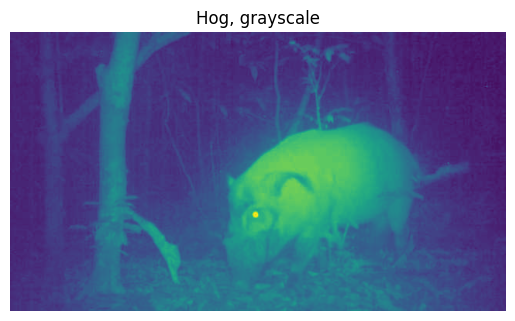

In [49]:
# Create figure with single axis
fig, ax = plt.subplots(1, 1)

# Plot gray channel of hog_tensor
ax.imshow(hog_tensor[0, :, :])

# Turn off x- and y-axis
ax.axis("off")

# Set title
ax.set_title("Hog, grayscale");

While the hog image is grayscale, the antelope image is in color. Its mode is RGB, which stands red, green, and blue. Each of these colors has its own channel in the image. That's where the `3` in the `antelope_tensor` shape `[3, 540, 960]` comes from. We can extract the values for each channel using our slicing skills and plot them side-by-side.

**Task 1.1.18:** Complete the code below to plot the red, green, and blue channels of `antelope_tensor`.

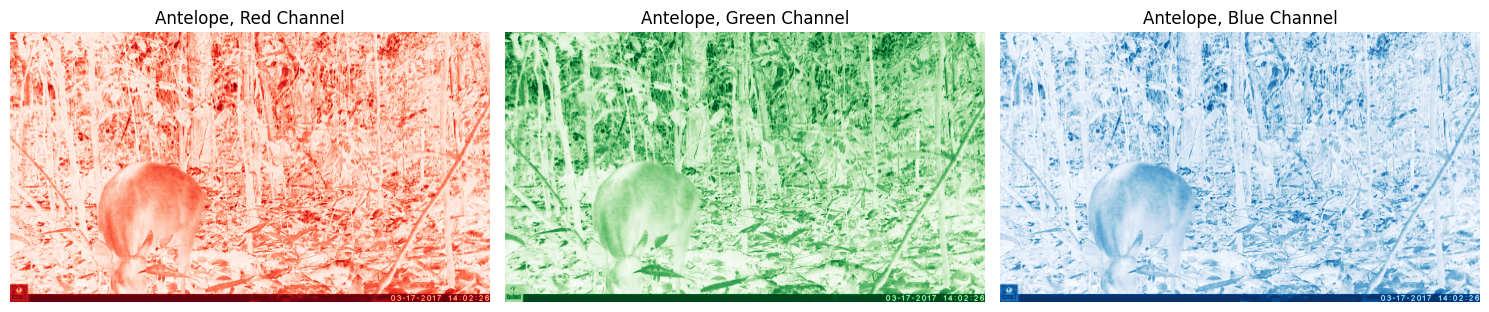

In [54]:
# Create figure with 3 subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

# Plot red channel
red_channel = antelope_tensor[0, :, :]
ax0.imshow(red_channel, cmap="Reds")
ax0.set_title("Antelope, Red Channel")
ax0.axis("off")

# Plot green channel
green_channel = antelope_tensor[1, :, :]
ax1.imshow(green_channel, cmap="Greens")
ax1.set_title("Antelope, Green Channel")
ax1.axis("off")


# Plot blue channel
blue_channel = antelope_tensor[2, :, :]
ax2.imshow(red_channel, cmap="Blues")
ax2.set_title("Antelope, Blue Channel")
ax2.axis("off")


plt.tight_layout();

The key takeaway is that the dimensions for an image tensor are always **(C x H x W)**, channel by height by width.

We know how the values in an image tensor are organized, but we haven't looked at the values themselves. Focusing on the `antelope_tensor` only, let's check its minimum and maximum values using the `.amax()` and `.amin()` methods.

**Task 1.1.19:** Calculate the minimum and maximum values of `antelope_tensor` and assign the results to `max_channel_values` and `min_channel_values`, respectively.

In [55]:
max_channel_values = antelope_tensor.amax()
min_channel_values = antelope_tensor.amin()

print("max_channel_values class:", type(max_channel_values))
print("max_channel_values shape:", max_channel_values.shape)
print("max_channel_values data type:", max_channel_values.dtype)
print("max_channel_values device:", max_channel_values.device)
print("Max values in antelope_tensor:", max_channel_values)
print()
print("min_channel_values class:", type(min_channel_values))
print("min_channel_values shape:", min_channel_values.shape)
print("min_channel_values data type:", min_channel_values.dtype)
print("min_channel_values device:", min_channel_values.device)
print("Min values in antelope_tensor:", min_channel_values)

max_channel_values class: <class 'torch.Tensor'>
max_channel_values shape: torch.Size([])
max_channel_values data type: torch.float32
max_channel_values device: cpu
Max values in antelope_tensor: tensor(1.)

min_channel_values class: <class 'torch.Tensor'>
min_channel_values shape: torch.Size([])
min_channel_values data type: torch.float32
min_channel_values device: cpu
Min values in antelope_tensor: tensor(0.)


We can see that the values in the tensor range from 0 to 1. 0 means that the color intensity at a particular pixel is 0%; 1 means intensity is 100%.

<div class="alert alert-info" role="alert">
It's equally common to see the values in an image tensor range from 0 to 255. In fact, that's how the values in our image files are actually stored. However, the <code>ToTensor()</code> class <a href="https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html#totensor">automatically converts</a> PIL images from <code>[0, 255]</code> to <code>[0, 1]</code>. So it's always a good idea to double-check image tensor values before building a model. 🤓
</div>

To end this lesson, we'll do an aggregation calculation to find the mean value for each color channel in `antelope_tensor`. Remember that the color channel is the first dimension in the tensor (index position `0` in Python). This means we want to reduce along the other two dimensions, height and width. They are at index positions `1` and `2`, respectively. 

**Task 1.1.20:** Calculate the mean values of the separate color channels in `antelope_tensor` and assign the result to `mean_channel_values`.

In [72]:
mean_channel_values = antelope_tensor.mean(dim=(1, 2))

print("mean_channel_values class:", type(mean_channel_values))
print("mean_channel_values shape:", mean_channel_values.shape)
print("mean_channel_values dtype:", mean_channel_values.dtype)
print("mean_channel_values device:", mean_channel_values.device)
print("Mean channel values in antelope_tensor (RGB):", mean_channel_values)

SyntaxError: positional argument follows keyword argument (136651371.py, line 1)

Excellent work! We'll see why it's important to calculate the mean of each color channel in the following lesson. For now, here are the key discoveries we've made about our dataset in this lesson:

- Our dataset is organized into folders. We have data for a binary classification model and a multi-class model. In both cases, the training data is divided into subdirectories, one for each class.
- The images in our dataset come in different sizes.
- The images in our dataset come in different modes (grayscale and RGB).
- When we convert our images from PIL to tensors, their values range from `0` to `1`.

In the next lesson, we'll build tools to combine our images into a uniform dataset of tensors. We'll also build and train a binary classification model using PyTorch. See you there soon!

---
This file &#169; 2024 by [WorldQuant University](https://www.wqu.edu/) is licensed under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/).